---

`conda install pytorch torchvision matplotlib ipykernel ipywidgets`

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
# first_gm.py

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import torch, os

def tensor2spikeship(rp_tensor):
    N_epochs, N_neurons, N_timesteps = rp_tensor.shape
    #epochs, neurons, times = np.where(rp_tensor>0)
    spike_times = np.array([])
    ii_spike_times = np.zeros([N_epochs, N_neurons, 2])
    nb_previous_timestamps = 0
    last_previous_timestamp = 0
    for e in range(N_epochs):
        neurons, times = np.where(rp_tensor[e,:,:]>0)
        for n in np.unique(neurons):
            indices = np.where(neurons==n)[0]
            ii_spike_times[e,n,:] = [indices[0], indices[-1]+1] + np.ones([2])*nb_previous_timestamps
            spike_times = np.hstack([spike_times,times[indices]]) if spike_times.shape[0]>0 else times[indices]
        nb_previous_timestamps += len(times)
        #last_previous_timestamp += times[-1]
    return spike_times, ii_spike_times

def plot_raster(raster, trial_nb = 0, colored=False, title = 'raster plot'):

    subplotpars = matplotlib.figure.SubplotParams(left=0.125, right=.95, bottom=0.25, top=.975, wspace=0.05, hspace=0.05,)

    xticks, yticks = 6, 16
    spikelength=.9
    colors = ['grey', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2',
 '#7f7f7f', '#bcbd22', '#17becf']
    figsize = (12, 1.61803)
    linewidths=1.0

    if colored:
        N_kernels, N_trials, N_neurons, N_timesteps = raster.shape
    else:
        N_trials, N_neurons, N_timesteps = raster.shape

    fig, ax = plt.subplots(1, 1, figsize=figsize, subplotpars=subplotpars)
    if colored:

        for i in range(0, N_neurons):
            for sm in range(N_kernels):
                ax.eventplot(np.where(raster[sm, trial_nb, i, :] > 0)[0],
                    colors=colors[sm], lineoffsets=1.*i+spikelength/2,
                    linelengths=spikelength, linewidths=linewidths)
    else:
        for i in range(0, N_neurons):
            ax.eventplot(np.where(raster[trial_nb, i, :] > 0)[0],
                colors=colors[0], lineoffsets=1.*i+spikelength/2,
                linelengths=spikelength, linewidths=linewidths)

    ax.set_ylabel('address')
    ax.set_xlabel('Time (a. u.)')
    ax.set_xlim(0, N_timesteps)
    ax.set_ylim(0, N_neurons)

    ax.set_yticks(np.arange(0, N_neurons, 1)+.5)
    ax.set_yticklabels('')#np.linspace(1, N_neurons, 9, endpoint=True).astype(int))
    for side in ['top', 'right']: ax.spines[side].set_visible(False)

    ax.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(N_timesteps/4))
    ax.set_xticks(np.linspace(1, N_timesteps, xticks, endpoint=True))
    ax.set_xticklabels(np.linspace(1, N_timesteps, xticks, endpoint=True).astype(int))
    ax.set_title(title)

    ax.grid(visible=True, axis='y', linestyle='-', lw=.5)
    #ax.grid(visible=True, axis='x', which='both', linestyle='-', lw=.1)
    return fig, ax

def plot_SM(SMs, N_show = 5, cmap='plasma', colors=None, aspect=None, figsize = (12, 1.61803)):
    subplotpars = matplotlib.figure.SubplotParams(left=0.125, right=.95, bottom=0.25, top=.975, wspace=0.05, hspace=0.05,)

    N_SMs, N_pre, N_delays = SMs.shape

    fig, axs = plt.subplots(1, N_show, figsize=figsize, subplotpars=subplotpars)
    for i_SM in range(N_show):
        ax = axs[i_SM]
        ax.set_axisbelow(True)
        ax.pcolormesh(SMs[i_SM, :, :].flip(1), cmap=cmap, vmin=SMs.min(), vmax=SMs.max())
        #ax.imshow(self.SMs[:, i_SM, :], cmap=cmap, vmin=0, vmax=1, interpolation='none')
        ax.set_xlim(0, N_delays)
        ax.set_xlabel('Delay')
        t = ax.text(.805*N_delays, .95*N_pre, f'#{i_SM+1}', color='k' if colors is None else colors[i_SM])
        t.set_bbox(dict(facecolor='white', edgecolor='white'))
        if not aspect is None: ax.set_aspect(aspect)

        ax.set_ylim(0, N_pre)
        ax.set_yticks(np.arange(0, N_pre, 1)+.5)
        if i_SM>0:
            ax.set_yticklabels([])
        else:
            ax.set_yticklabels(np.arange(0, N_pre, 1)+1)

        for side in ['top', 'right']: ax.spines[side].set_visible(False)
        ax.set_xticks([1, N_delays//3, (N_delays*2)//3])
        ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(N_delays//4))

    axs[0].set_ylabel('@ Neuron')
    return fig, axs


def gaussian_kernel(n_steps, mu, std):
    x = torch.arange(n_steps)
    return torch.exp(-(x-mu)**2/(2*std**2))/(std*torch.sqrt(torch.Tensor([2*torch.pi])))

In [ ]:
!pip install git+https://github.com/bsotomayorg/SpikeShip.git

  Cloning https://github.com/bsotomayorg/SpikeShip.git to /tmp/pip-req-build-wsguu7b_
  Running command git clone --filter=blob:none --quiet https://github.com/bsotomayorg/SpikeShip.git /tmp/pip-req-build-wsguu7b_
  Resolved https://github.com/bsotomayorg/SpikeShip.git to commit 557ce63940cd45a997e9bc43c3a778f507f38945
  Preparing metadata (setup.py) ... done
  Created wheel for SpikeShip: filename=SpikeShip-1.0-py3-none-any.whl size=6077 sha256=fd6492f6be5ec33b6f306fce3af444e15e3aab02dda74d8c55cebfc429593656
  Stored in directory: /tmp/pip-ephem-wheel-cache-lewf7wgj/wheels/74/98/3c/2fdd8a6b034ea5c8be91440192032ce49e4a269c9643ae49cd
Successfully built SpikeShip


In [ ]:
class SM_World:
    def __init__(self, opt, add_coef = None):
        # initialization of the parameters + drawing of the kernels
        # here one of the kernels is a combination of the 2 first ones with parameter add_coef ([0,1])
        self.opt: Params = opt
        if add_coef:
            self.kernels = torch.zeros(self.opt.N_kernels+1, self.opt.N_pre, self.opt.N_delays)
        else:
            self.kernels = torch.zeros(self.opt.N_kernels, self.opt.N_pre, self.opt.N_delays)

        for k in range(self.kernels.shape[0]):
            nb_spikes = int(torch.normal(torch.Tensor([self.opt.avg_N_spikes]), torch.Tensor([self.opt.std_N_spikes])).abs())
            addr, delay, precision = (torch.randint(self.opt.N_pre, [nb_spikes]), torch.randint(self.opt.N_delays, [nb_spikes]), torch.normal(torch.ones([nb_spikes])*self.opt.avg_precision, torch.ones([nb_spikes])*self.opt.std_precision).abs())
            for s in range(nb_spikes):
                self.kernels[k, addr[s], :] += gaussian_kernel(self.opt.N_delays, delay[s], 1/precision[s])
            if self.kernels[k, :, :].max()>1: self.kernels[k, :,:]/=self.kernels[k, :, :].max()
        if add_coef:
            self.kernels[-1, :, :] = (1-add_coef)*self.kernels[0, :, :] + add_coef*self.kernels[1, :, :]

    def draw_input_one_sm(self, N_trials = 1, do_channels = False):

        spontaneous_activity = torch.bernoulli(torch.ones([N_trials, self.opt.N_pre, self.opt.N_timesteps])*self.opt.p_spontaneous)

        labels = torch.randint(self.kernels.shape[0], [N_trials])

        if do_channels:
            input_rp_with_channels = torch.zeros([self.kernels.shape[0]+1, N_trials, self.opt.N_pre, self.opt.N_timesteps])
            for k in labels.unique():
                indices = labels==k
                trials = torch.bernoulli(self.kernels[k,:,:].unsqueeze(0).repeat(indices.sum(),1,1))
                input_rp_with_channels[k+1,indices,:,:] = trials
                input_rp_with_channels[0,indices,:,:] = spontaneous_activity[indices,:,:]
            return input_rp_with_channels, labels
        else:
            input_rp = torch.zeros([N_trials, self.opt.N_pre, self.opt.N_timesteps])
            for k in labels.unique():
                indices = labels==k
                trials = torch.bernoulli(self.kernels[k,:,:].unsqueeze(0).repeat(indices.sum(),1,1))
                input_rp[indices,:,:] = torch.max(trials, spontaneous_activity[indices])
            return input_rp, labels


In [ ]:
import torch
import numpy as np
#from first_gm import SM_World, plot_SM, plot_raster, gaussian_kernel, tensor2spikeship

In [ ]:
class world_params:
    N_pre = 200 # number of neurons in the RP
    N_delays = 51 # number of timesteps in the SM (must be an odd number for convolutions)
    N_kernels = 2 # number of SM used for RP generation

    p_input = .05 # global probability of having a spike in the timebins of the RP as input
    sm_ratio = .5 # probability of a spike as input to belong to the SM
    p_spontaneous =  p_input*(1-sm_ratio)
    p_spike_in_motif = p_input*sm_ratio # probability of having a spike in the timebins of the SM

    avg_N_spikes = p_spike_in_motif*N_delays*N_pre
    std_N_spikes = 1

    N_timesteps =  N_delays # number of timesteps in the RP

    avg_precision = 10 # average precision for the spikes in the SM (inverse of variance of the gaussian distribution defined for 1 spike)
    std_precision = 1 # variance for the precision

    seed = 4815162342 # seed

    # N_pre         = 50 #20 # number of neurons in the RP
    # N_delays      = 401 # 51 # number of timesteps in the SM (must be a odd number for convolutions)
    # N_kernels     = 5 # number of SM used for RP generation

    # p_input       = .1 # probability of having spike for the input
    # SM_ratio      = 2#10 # coefficient that gives the SM/noise spike ratio
    # N_timesteps   =  2**10 # number of timesteps in the RP

    # p_spontaneous = p_input/(1+SM_ratio) # probability of the spontaneous activity

    # # TODO define all this better to work only with probability values
    # avg_N_spikes  = N_delays*N_pre*(p_spontaneous*0.5) # average number of spikes per SM
    # std_N_spikes  = 1 # variance for the number of spikes per SM

    # #p_sm = p_input*SM_ratio/(1+SM_ratio)
    # p_output = p_input*SM_ratio/((1+SM_ratio)*avg_N_spikes)

    # avg_precision = 10 # average precision for the spikes in the SM (inverse of variance of the gaussian distribution defined for 1 spike)
    # std_precision = 1 # variance for the precision

    # seed = 4815162342 # seed

## Model with 2 motifs and a combination of the 2

In [ ]:
N_trials = 10
add_coef = .2

In [ ]:
opt = world_params()
world = SM_World(opt, add_coef = add_coef)
input_rp, labels = world.draw_input_one_sm(N_trials = N_trials, do_channels = True)

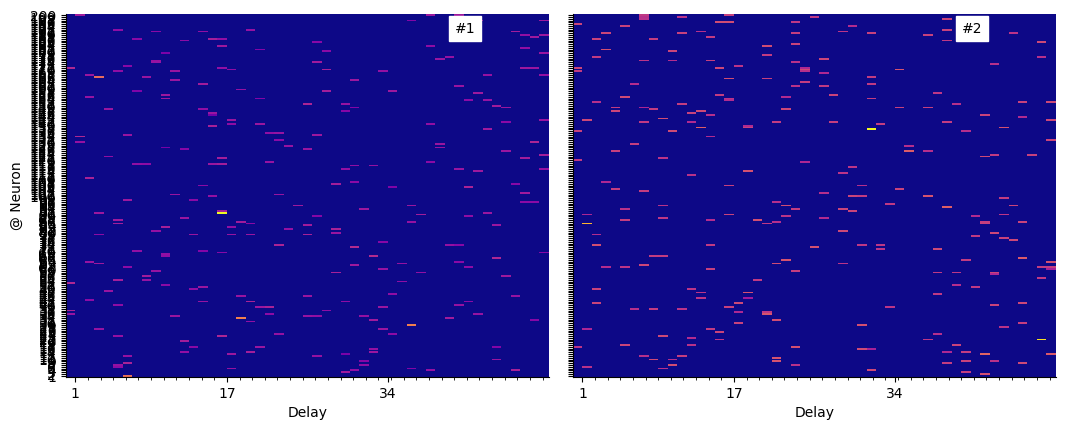

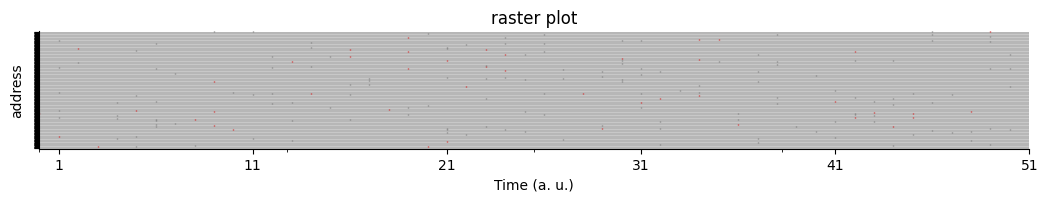

In [ ]:
plot_SM(world.kernels, N_show = opt.N_kernels, figsize = (12, 5));
plot_raster(input_rp, colored=True);

### Format the ouput for SpikeShip

In [ ]:
N_trials =  600
add_coef = .4

In [ ]:
opt = world_params()
world = SM_World(opt, add_coef = add_coef)

In [ ]:
%%time
input_rp, labels = world.draw_input_one_sm(
    N_trials = N_trials
    )
spike_times, ii_spike_times = tensor2spikeship(input_rp)
ii_spike_times.shape

CPU times: user 13 s, sys: 95.6 ms, total: 13 s
Wall time: 19.1 s


(600, 200, 2)

In [ ]:
spike_times, ii_spike_times = tensor2spikeship(input_rp)
ii_spike_times = ii_spike_times.astype('int32')
labels = labels.numpy()

In [ ]:
ii_spike_times.shape

(600, 200, 2)

In [ ]:
spike_times.shape

(223279,)

In [ ]:
from spikeship import spikeship

/usr/local/lib/python3.10/dist-packages/numba/core/decorators.py:253: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


In [ ]:
%%time
S_dist = spikeship.distances(spike_times, ii_spike_times)

CPU times: user 46.9 s, sys: 130 ms, total: 47 s
Wall time: 36 s


In [ ]:
si = np.argsort(labels)

## Data Vis

### Dissimilarity matrix

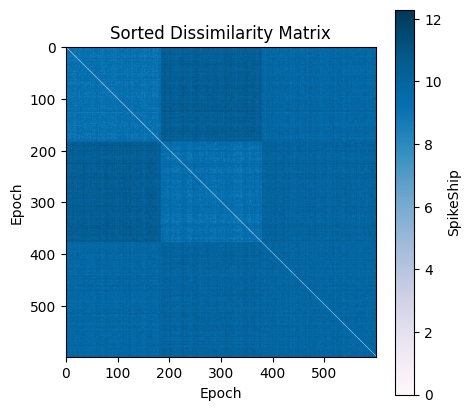

In [ ]:
fig, axs = plt.subplots(figsize=(5,5), facecolor='w')
axs.set_xlabel("Epoch"); axs.set_ylabel("Epoch");
im = axs.imshow(S_dist[:,si][si], cmap='PuBu')
axs.set_title("Sorted Dissimilarity Matrix")
cbar = plt.colorbar(im, ax=axs)
cbar.set_label("SpikeShip", fontsize=10)

### 2D t-SNE emb

In [ ]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import silhouette_score

In [ ]:
def get_2d_tsne_embedding(diss, perplexity=70.):
    return TSNE(metric='precomputed', n_components=2, random_state=0, perplexity=perplexity, init='random').fit_transform(diss)

In [ ]:
S_emb = get_2d_tsne_embedding(S_dist, perplexity = 30)

<ipython-input-23-da0a1a214961>:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axs.scatter(S_emb[temp_mask,0], S_emb[temp_mask,1], c=l_colors[i], s = 5, cmap='Set1')


Text(0.5, 1.0, '2D t-SNE embedding')

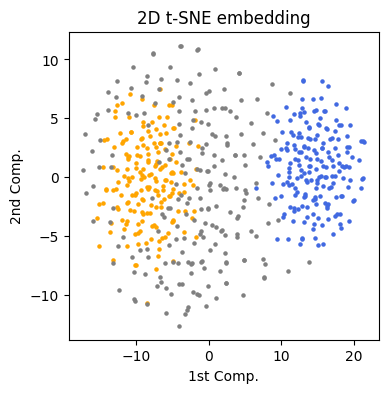

In [ ]:
fig, axs = plt.subplots(facecolor='w', figsize=(4,4))
l_colors=['orange', 'royalblue', 'gray']
unique_labels = np.unique(labels)
for i in range(len(unique_labels)):
    label_id = unique_labels[i]
    temp_mask = labels == label_id
    axs.scatter(S_emb[temp_mask,0], S_emb[temp_mask,1], c=l_colors[i], s = 5, cmap='Set1')
axs.set_xlabel("1st Comp.")
axs.set_ylabel("2nd Comp.")

axs.set_title('2D t-SNE embedding')

**`Missing:`**
+ label of each epoch.

**`Change`**:
+ Span pattern across window length or
+ Reduce SNR.

**``TODO:``**

Make different combinations of two sources in discrete steps (i.e. $\lambda=\{0,0.2,0.4,...,1\}$, then $P_3 \equiv \lambda_i P_1 + (1-\lambda_i) P_2$).

### Clustering performance

Requirements:
+ Patterns with discrete steps of mixture/combination